# Women vs Men Goals Analysis

This project analyzes FIFA World Cup matches since 2002 to determine if women's matches have more goals than men's matches.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

In [19]:
# Load datasets
men = pd.read_csv("data/men_results.csv")
women = pd.read_csv("data/women_results.csv")

# Convert date columns to datetime
men["date"] = pd.to_datetime(men["date"])
women["date"] = pd.to_datetime(women["date"])

# Filter FIFA World Cup matches after 2002
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"] == "FIFA World Cup")]
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"] == "FIFA World Cup")]

In [20]:
# Calculate total goals per match
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_10292\782522785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_10292\782522785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]


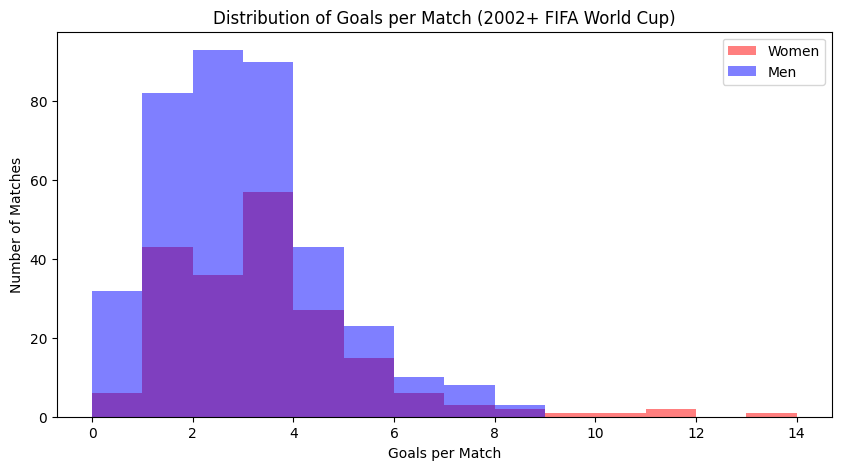

In [21]:
plt.figure(figsize=(10,5))
plt.hist(women_subset["goals_scored"], bins=range(0,15), alpha=0.5, label="Women", color='red')
plt.hist(men_subset["goals_scored"], bins=range(0,15), alpha=0.5, label="Men", color='blue')
plt.xlabel("Goals per Match")
plt.ylabel("Number of Matches")
plt.title("Distribution of Goals per Match (2002+ FIFA World Cup)")
plt.legend()
plt.show()

C:\Users\Default.DESKTOP-IT4P83D\AppData\Local\Temp\ipykernel_10292\2294793255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="goals_scored", data=both, palette=["red","blue"])


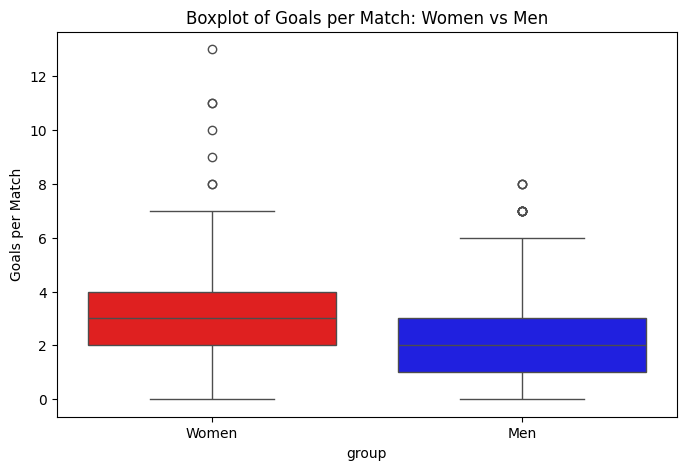

In [22]:
# Combine datasets for visualization
both = pd.concat([women_subset.assign(group="Women"), men_subset.assign(group="Men")])

plt.figure(figsize=(8,5))
sns.boxplot(x="group", y="goals_scored", data=both, palette=["red","blue"])
plt.ylabel("Goals per Match")
plt.title("Boxplot of Goals per Match: Women vs Men")
plt.show()


In [23]:
# One-tailed Mann-Whitney U test
stat, p_val = mannwhitneyu(
    women_subset["goals_scored"],
    men_subset["goals_scored"],
    alternative="greater"
)

# Hypothesis test result at alpha = 0.10
if p_val < 0.10:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

print("Result Dictionary:", result_dict)


Result Dictionary: {'p_val': np.float64(0.005106609825443641), 'result': 'reject'}


## Interpretation

- **Null hypothesis (H0):** The mean number of goals scored in women's FIFA World Cup matches is the same as men's.
- **Alternative hypothesis (H1):** The mean number of goals scored in women's FIFA World Cup matches is greater than men's.

Based on the Mann–Whitney U test (one-tailed, right-tailed):

In [24]:
# Print human-readable interpretation
if result == "reject":
    print("We reject the null hypothesis. Women’s FIFA World Cup matches have a higher average number of goals than men’s matches.")
else:
    print("We fail to reject the null hypothesis. There is no statistical evidence that women’s matches have more goals than men’s.")

We reject the null hypothesis. Women’s FIFA World Cup matches have a higher average number of goals than men’s matches.
